# 1. 부분회귀

- 독립변수 추가시 회귀계수coefficient 달라짐
- $w_1 \neq w_1'$
## $$
y = w_1x_1 + e\\
y = w_1'x_1 + w_2'x_2 + e'
$$
- 증명
     
     1) 변수 하나(직교방정식)
     
#### $$
(X_1^TX_1)w_1 = X_1^Ty
$$

    2) 변수 추가(직교방정식)

#### $$
\begin{bmatrix}
X_1^TX_1 & X_1^TX_2 \\
X_2^TX_1 & X_2^TX_2 \\
\end{bmatrix}
\begin{bmatrix}
w_1'\\
w_2'\\
\end{bmatrix}
=
\begin{bmatrix}
X_1^Ty\\
X_2^Ty
\end{bmatrix}
$$
    3) 비교
      
#### $$
w_1' = (X_1^TX_1)^{-1}X_1^Ty-(X_1^TX_1)^{-1}X_1^TX_2w_2'\\
w_1' = w_1 - \ldots
$$

## 1.1 결과 같은 경우
#### 1) $w_2'=0 \rightarrow$ $x_2와 y$ 상관관계 없음
#### 2) $X_1^TX_2 = 0 \rightarrow$ $x_1과 x_2$ 상관관계 없음

# 2. Frisch-Waugh-Lovell(FWL) 정리
3번 회귀분석


1) z제외한 x들로 y회귀분석 $\rightarrow$ 잔차 $y^*$


2) x들로 z회귀분석 $\rightarrow$ 잔차 $z^*$

3) $z^*$로 $y^*$ 회귀분석 $\rightarrow w_z$ 



## 2.1 평균제거 데이터
- 상수항만 사용하여 회귀분석 $\rightarrow$ X, Y 평균제거
- 따라서 X, Y 평균제거 데이터 회귀분석시, 상수항 없앨 것

partial plot 연습


-  `sm.graphics.plot_partregress(col[-1], col[1], list(col2), data=df, ret_coords=True)`
- `sm.graphics.plot_ccpr(result_boston, "CRIM")`
- `sm.graphics.plot_partregress_grid(result_boston, fig=fig)`



In [45]:
from sklearn.datasets import load_boston
import statsmodels.api as sm
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

In [65]:
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
col = df.columns
col2 = df.drop(['MEDV','CRIM'], axis=1).columns

1) Partial Regression Plot

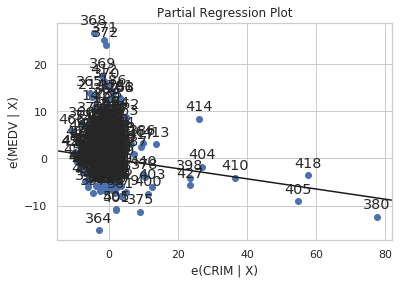

In [67]:
p, resids = sm.graphics.plot_partregress(col[-1], col[1], list(col2), data=df, ret_coords=True)

2) CCPR(Component-Component plus Residual) plot

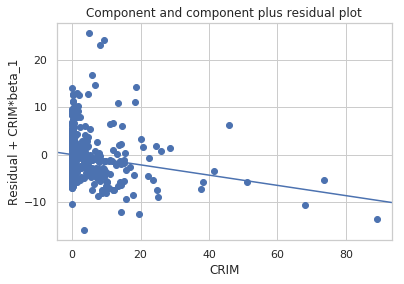

In [71]:
sm.graphics.plot_ccpr(result_boston, "CRIM")
plt.show()

3) Partial regression plot for every exogenous

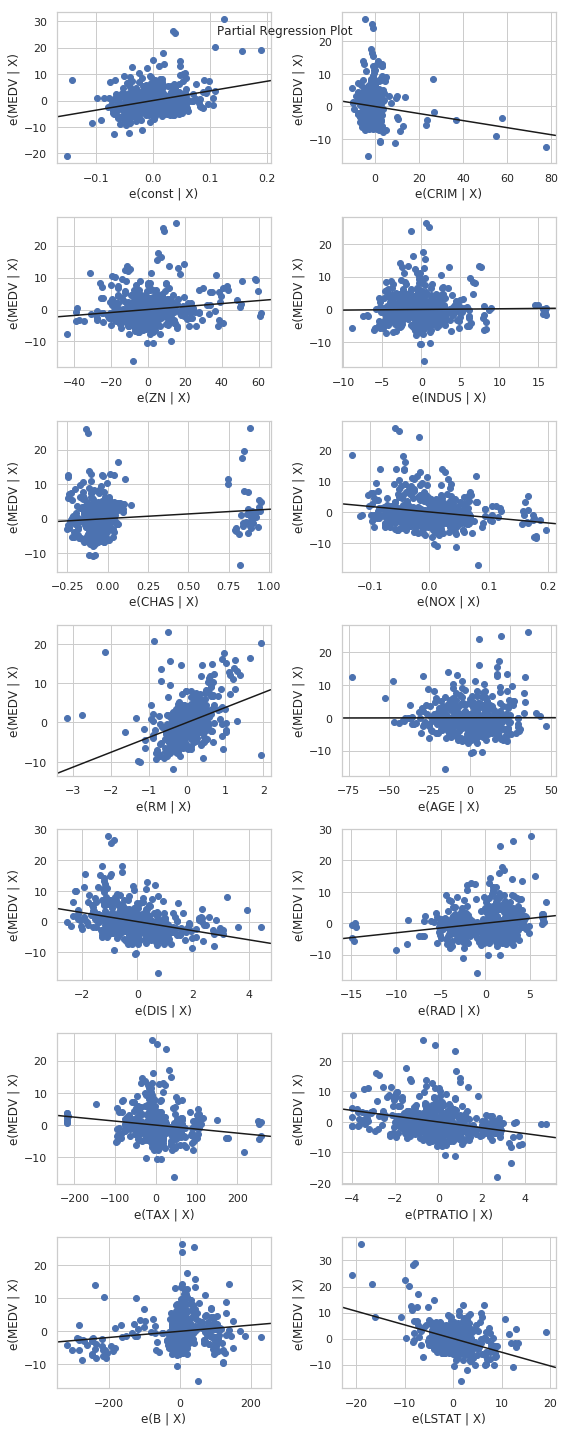

In [44]:
%matplotlib inline
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
plt.tight_layout()
plt.show()